In [100]:
import numpy as np
import h5py
import os
import pandas as pd

In [101]:
1+2

3

In [102]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

Populating the interactive namespace from numpy and matplotlib


In [112]:
resultsdir = '../results/cartpole_ddpg_stable'

In [113]:
sorted(os.listdir(resultsdir))

['debug',
 'lrq1e-1_momentum0.2_nesterov',
 'lrq1e-1_momentum0.2_nesterov_alpha2',
 'lrq1e-1_momentum0.2_nesterov_alpha2_backwards',
 'lrq1e-1_momentum0.2_nesterov_alpha2_backwards_wd1e_3',
 'lrq1e-1_momentum0.2_nesterov_alpha2_backwards_wd1e_5',
 'lrq1e-1_momentum0.2_nesterov_alpha2_delayed_prioritized_ste',
 'lrq1e-1_momentum0.2_nesterov_alpha2_delayed_ste',
 'lrq1e-1_momentum0.2_nesterov_alpha2_delayed_w_returns_ste',
 'lrq1e-1_momentum0.2_nesterov_alpha2_normal_ste',
 'lrq1e-1_momentum0.2_nesterov_alpha2_not_discrete',
 'lrq1e-1_momentum0.2_nesterov_alpha2_prioritized',
 'lrq1e-1_momentum0.2_nesterov_alpha2_prioritized_binarized',
 'lrq1e-1_momentum0.2_nesterov_alpha2_prioritized_cont_sh3.',
 'lrq1e-1_momentum0.2_nesterov_alpha2_prioritized_cont_sh3.0',
 'lrq1e-1_momentum0.2_nesterov_alpha2_prioritized_recheck',
 'lrq1e-1_momentum0.2_nesterov_alpha2_prioritized_ste',
 'lrq1e-1_momentum0.2_nesterov_alpha2_prioritized_ste_bs100',
 'lrq1e-1_momentum0.2_nesterov_alpha2_prioritized_ste_

In [114]:
savedirs = {k: os.path.join(resultsdir,k) for k in os.listdir(resultsdir)}

In [115]:
def loadHDF5(filepath):
    output = {}
    with h5py.File(filepath,'r') as f:
        for k in f:
            output[k] = np.array(f[k])
    return output

In [116]:
results = {}
for sd in sorted(savedirs):
    results[sd] = {}
    data = []
    for rd in os.listdir(savedirs[sd]):
        filepath = os.path.join(savedirs[sd],rd,'log.h5')
        
        if os.path.exists(filepath):
            data.append(loadHDF5(filepath))
        else:
            print('path does not exist',filepath)

    if len(data) > 0:
        keys = data[0].keys()
        for k in keys:
            V = [v[k] for v in data]
            if len(V[0].shape) == 1:
                results[sd][k] = np.stack(V)
            else:
                results[sd][k] = np.concatenate(V,axis=-1).T
            print(sd,k,results[sd][k].shape,V[0].shape)
    if len(results[sd]) == 0:
        results.pop(sd)

path does not exist ../results/cartpole_ddpg_stable/debug/experiment-1651214002105477577/log.h5
path does not exist ../results/cartpole_ddpg_stable/debug/experiment1590563963467/log.h5
path does not exist ../results/cartpole_ddpg_stable/debug/experiment1590563865210/log.h5
path does not exist ../results/cartpole_ddpg_stable/debug/experiment-3823470866821973022/log.h5
path does not exist ../results/cartpole_ddpg_stable/debug/experiment7720181256336419292/log.h5
path does not exist ../results/cartpole_ddpg_stable/debug/experiment1589700510297/log.h5
path does not exist ../results/cartpole_ddpg_stable/debug/experiment1589700275010/log.h5
path does not exist ../results/cartpole_ddpg_stable/debug/experiment390670249877827111/log.h5
path does not exist ../results/cartpole_ddpg_stable/debug/experiment-1299790818316335564/log.h5
path does not exist ../results/cartpole_ddpg_stable/debug/experiment-1200330982635476536/log.h5
path does not exist ../results/cartpole_ddpg_stable/debug/experiment-49

lrq1e-1_momentum0.2_nesterov_alpha2_normal_ste Q (10, 9900) (9900,)
lrq1e-1_momentum0.2_nesterov_alpha2_normal_ste action_history (100, 10000) (10000, 10)
lrq1e-1_momentum0.2_nesterov_alpha2_normal_ste duration_cumulative (10, 10000) (10000,)
lrq1e-1_momentum0.2_nesterov_alpha2_normal_ste reward_history (100, 10000) (10000, 10)
lrq1e-1_momentum0.2_nesterov_alpha2_normal_ste step_duration_sec (10, 10000) (10000,)
lrq1e-1_momentum0.2_nesterov_alpha2_normal_ste test_ep_returns (100, 99) (99, 10)
lrq1e-1_momentum0.2_nesterov_alpha2_normal_ste test_ep_steps (10, 99) (99,)
path does not exist ../results/cartpole_ddpg_stable/lrq1e-1_momentum0.2_nesterov_alpha2_not_discrete/experiment-3187987673956148337/log.h5
path does not exist ../results/cartpole_ddpg_stable/lrq1e-1_momentum0.2_nesterov_alpha2_not_discrete/experiment-4364421458855136082/log.h5
path does not exist ../results/cartpole_ddpg_stable/lrq1e-1_momentum0.2_nesterov_alpha2_not_discrete/experiment901752619240176550/log.h5
path does n

lrq1e-1_momentum0.2_nesterov_alpha2_prioritized_ste_bs128 Q (9, 9900) (9900,)
lrq1e-1_momentum0.2_nesterov_alpha2_prioritized_ste_bs128 action_history (90, 10000) (10000, 10)
lrq1e-1_momentum0.2_nesterov_alpha2_prioritized_ste_bs128 beta (9, 39600) (39600,)
lrq1e-1_momentum0.2_nesterov_alpha2_prioritized_ste_bs128 duration_cumulative (9, 10000) (10000,)
lrq1e-1_momentum0.2_nesterov_alpha2_prioritized_ste_bs128 max_importance_weight (9, 39600) (39600,)
lrq1e-1_momentum0.2_nesterov_alpha2_prioritized_ste_bs128 priorities (90000, 10, 1) (1, 10, 10000)
lrq1e-1_momentum0.2_nesterov_alpha2_prioritized_ste_bs128 reward_history (90, 10000) (10000, 10)
lrq1e-1_momentum0.2_nesterov_alpha2_prioritized_ste_bs128 sample_importance_weights (900, 1) (1, 100)
lrq1e-1_momentum0.2_nesterov_alpha2_prioritized_ste_bs128 step_duration_sec (9, 10000) (10000,)
lrq1e-1_momentum0.2_nesterov_alpha2_prioritized_ste_bs128 test_ep_returns (90, 99) (99, 10)
lrq1e-1_momentum0.2_nesterov_alpha2_prioritized_ste_bs128 

path does not exist ../results/cartpole_ddpg_stable/normal_lrq1e_2_rms_prop/experiment-4539814590558557072/log.h5
path does not exist ../results/cartpole_ddpg_stable/normal_lrq1e_2_rms_prop/experiment-8694082624828826762/log.h5
path does not exist ../results/cartpole_ddpg_stable/normal_lrq1e_2_rms_prop/experiment-4860846066730762349/log.h5
path does not exist ../results/cartpole_ddpg_stable/normal_lrq1e_2_rms_prop/experiment-4603116311101109067/log.h5
path does not exist ../results/cartpole_ddpg_stable/normal_lrq1e_2_rms_prop/experiment6911632791436950610/log.h5
normal_lrq1e_2_rms_prop Q (5, 9900) (9900,)
normal_lrq1e_2_rms_prop action_history (50, 10000) (10000, 10)
normal_lrq1e_2_rms_prop beta (5, 0) (0,)
normal_lrq1e_2_rms_prop duration_cumulative (5, 10000) (10000,)
normal_lrq1e_2_rms_prop max_importance_weight (5, 0) (0,)
normal_lrq1e_2_rms_prop reward_history (50, 10000) (10000, 10)
normal_lrq1e_2_rms_prop step_duration_sec (5, 10000) (10000,)
normal_lrq1e_2_rms_prop test_ep_retu

In [117]:
for sd in sorted(results):
    print(sd,results[sd]['test_ep_returns'].shape)

lrq1e-1_momentum0.2_nesterov (90, 99)
lrq1e-1_momentum0.2_nesterov_alpha2 (100, 99)
lrq1e-1_momentum0.2_nesterov_alpha2_backwards_wd1e_3 (100, 99)
lrq1e-1_momentum0.2_nesterov_alpha2_delayed_prioritized_ste (100, 99)
lrq1e-1_momentum0.2_nesterov_alpha2_delayed_ste (100, 99)
lrq1e-1_momentum0.2_nesterov_alpha2_delayed_w_returns_ste (100, 99)
lrq1e-1_momentum0.2_nesterov_alpha2_normal_ste (100, 99)
lrq1e-1_momentum0.2_nesterov_alpha2_not_discrete (100, 99)
lrq1e-1_momentum0.2_nesterov_alpha2_prioritized (100, 99)
lrq1e-1_momentum0.2_nesterov_alpha2_prioritized_binarized (100, 99)
lrq1e-1_momentum0.2_nesterov_alpha2_prioritized_cont_sh3.0 (90, 99)
lrq1e-1_momentum0.2_nesterov_alpha2_prioritized_recheck (100, 99)
lrq1e-1_momentum0.2_nesterov_alpha2_prioritized_ste (100, 99)
lrq1e-1_momentum0.2_nesterov_alpha2_prioritized_ste_bs100 (100, 99)
lrq1e-1_momentum0.2_nesterov_alpha2_prioritized_ste_bs128 (90, 99)
lrq1e-1_momentum0.2_nesterov_alpha2_prioritized_ste_bs32 (100, 99)
lrq1e-1_momentum0

In [109]:
def smooth(x,k=10.):
    return np.convolve(x,np.ones(int(k))*1./k)

In [110]:
def plot_percentiles(x,y=None,label=None,smoothing=False):
    if y is None:
        y = x
        x = np.arange(len(y))
    p10 = np.percentile(y,10,axis=1)
    mean = y.mean(axis=1)
    p90 = np.percentile(y,90,axis=1)
    
    if smoothing:
        f = lambda y: smooth(y)
        p10 = f(p10)
        mean = f(mean)
        p90 = f(p90)
        x = np.arange(len(mean))
        
    plt.fill_between(x,p10,p90,alpha=0.25)
    plt.plot(x,mean,label=label)

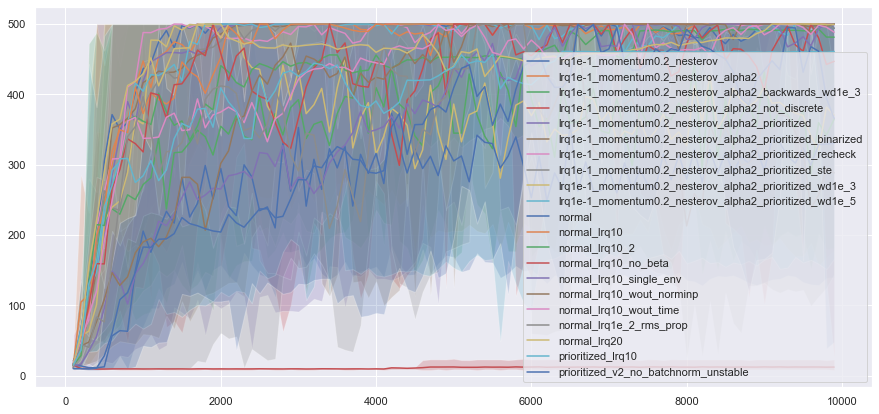

In [54]:
key = 'test_ep_returns'
plt.figure(figsize=(15,7))
for sd in results:
    plot_percentiles(results[sd]['test_ep_steps'][0],results[sd][key].T,label=sd)
_ = plt.legend()

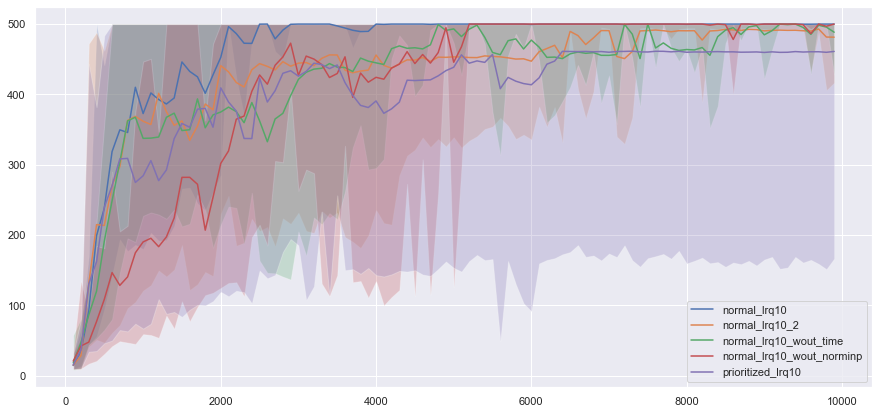

In [55]:
key = 'test_ep_returns'
plt.figure(figsize=(15,7))
for sd in ['normal_lrq10','normal_lrq10_2','normal_lrq10_wout_time','normal_lrq10_wout_norminp','prioritized_lrq10']:
    plot_percentiles(results[sd]['test_ep_steps'][0],results[sd][key].T,label=sd)
_ = plt.legend()

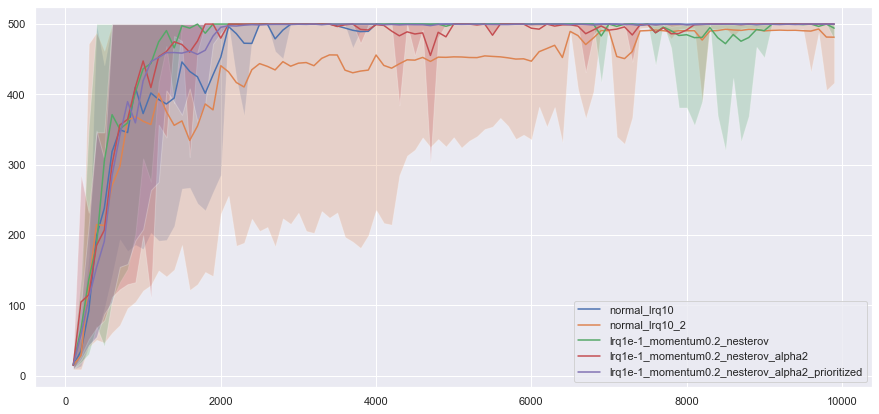

In [56]:
key = 'test_ep_returns'
plt.figure(figsize=(15,7))
for sd in ['normal_lrq10',
           'normal_lrq10_2',
           'lrq1e-1_momentum0.2_nesterov',
           'lrq1e-1_momentum0.2_nesterov_alpha2',
           'lrq1e-1_momentum0.2_nesterov_alpha2_prioritized']:
    plot_percentiles(results[sd]['test_ep_steps'][0],results[sd][key].T,label=sd)
_ = plt.legend()

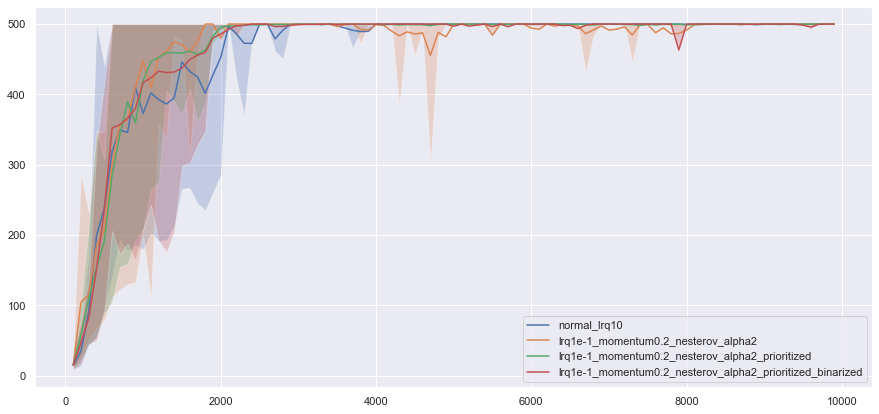

In [57]:
key = 'test_ep_returns'
plt.figure(figsize=(15,7))
for sd in ['normal_lrq10',
           'lrq1e-1_momentum0.2_nesterov_alpha2',
           'lrq1e-1_momentum0.2_nesterov_alpha2_prioritized',
           'lrq1e-1_momentum0.2_nesterov_alpha2_prioritized_binarized'
          ]:
    plot_percentiles(results[sd]['test_ep_steps'][0],results[sd][key].T,label=sd)
_ = plt.legend()

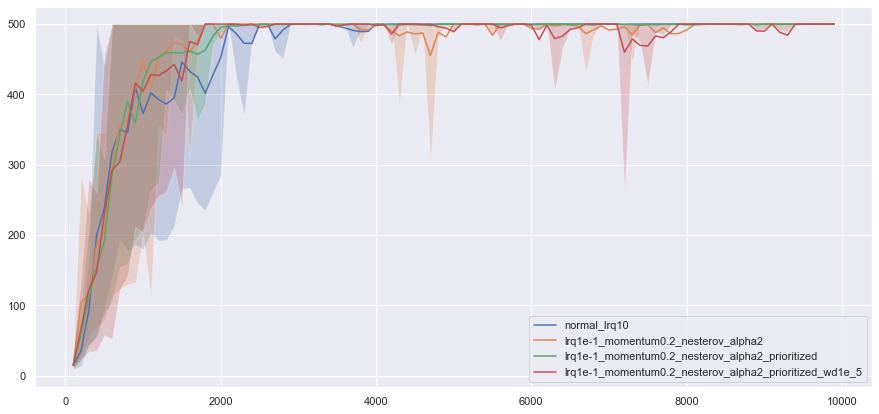

In [58]:
key = 'test_ep_returns'
plt.figure(figsize=(15,7))
for sd in ['normal_lrq10',
           'lrq1e-1_momentum0.2_nesterov_alpha2',
           'lrq1e-1_momentum0.2_nesterov_alpha2_prioritized',
           #'lrq1e-1_momentum0.2_nesterov_alpha2_backwards_wd1e_5',
           'lrq1e-1_momentum0.2_nesterov_alpha2_prioritized_wd1e_5',
          ]:
    plot_percentiles(results[sd]['test_ep_steps'][0],results[sd][key].T,label=sd)
_ = plt.legend()

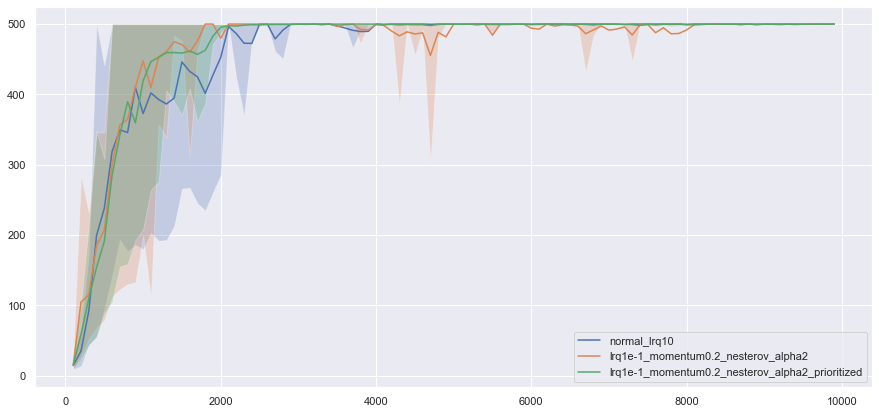

In [59]:
key = 'test_ep_returns'
plt.figure(figsize=(15,7))
for sd in ['normal_lrq10',
           'lrq1e-1_momentum0.2_nesterov_alpha2',
           'lrq1e-1_momentum0.2_nesterov_alpha2_prioritized',
           #'lrq1e-1_momentum0.2_nesterov_alpha2_prioritized_binarized',
           #'lrq1e-1_momentum0.2_nesterov_alpha2_prioritized_wd1e_5',
          ]:
    plot_percentiles(results[sd]['test_ep_steps'][0],results[sd][key].T,label=sd)
_ = plt.legend()

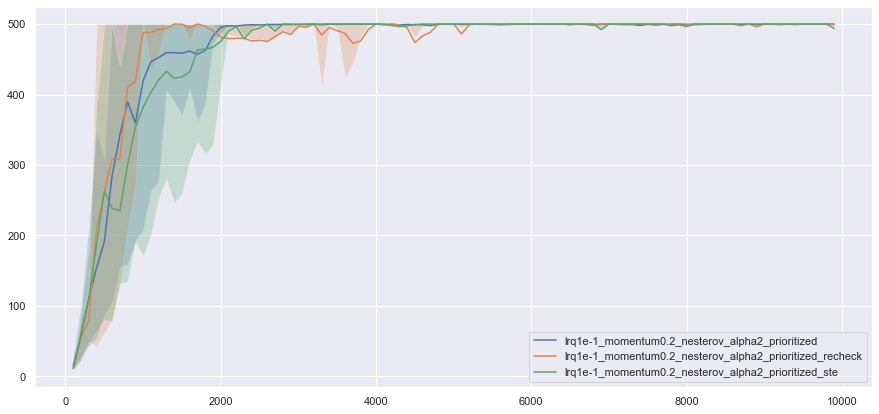

In [60]:
key = 'test_ep_returns'
plt.figure(figsize=(15,7))
for sd in [
           'lrq1e-1_momentum0.2_nesterov_alpha2_prioritized',
           'lrq1e-1_momentum0.2_nesterov_alpha2_prioritized_recheck',
           'lrq1e-1_momentum0.2_nesterov_alpha2_prioritized_ste',
          ]:
    plot_percentiles(results[sd]['test_ep_steps'][0],results[sd][key].T,label=sd)
_ = plt.legend()

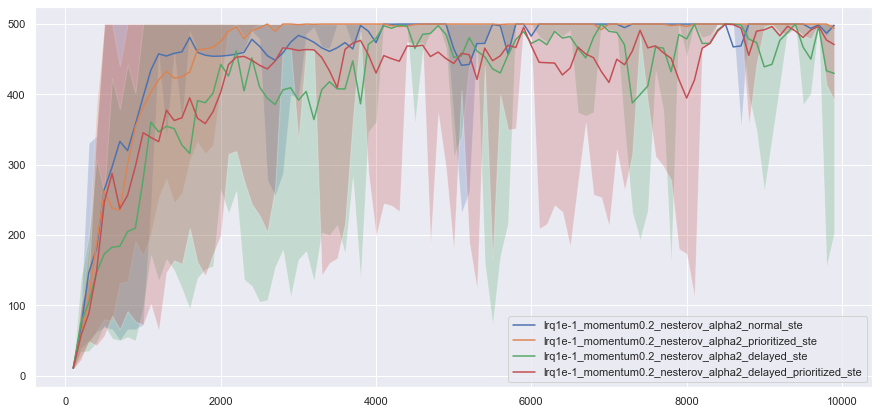

In [77]:
key = 'test_ep_returns'
plt.figure(figsize=(15,7))
for sd in [
           'lrq1e-1_momentum0.2_nesterov_alpha2_normal_ste',
           'lrq1e-1_momentum0.2_nesterov_alpha2_prioritized_ste',
           'lrq1e-1_momentum0.2_nesterov_alpha2_delayed_ste',
           'lrq1e-1_momentum0.2_nesterov_alpha2_delayed_prioritized_ste',
          ]:
    plot_percentiles(results[sd]['test_ep_steps'][0],results[sd][key].T,label=sd)
_ = plt.legend()

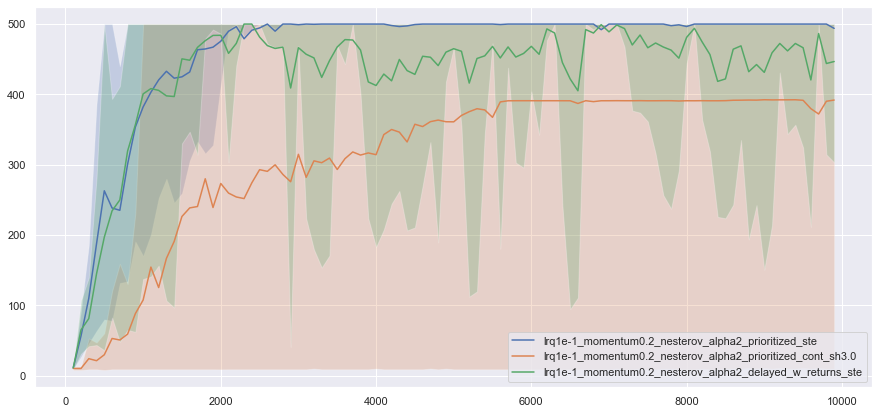

In [99]:
key = 'test_ep_returns'
plt.figure(figsize=(15,7))
for sd in [
           'lrq1e-1_momentum0.2_nesterov_alpha2_prioritized_ste',
           'lrq1e-1_momentum0.2_nesterov_alpha2_prioritized_cont_sh3.0',
           'lrq1e-1_momentum0.2_nesterov_alpha2_delayed_w_returns_ste',
          ]:
    plot_percentiles(results[sd]['test_ep_steps'][0],results[sd][key].T,label=sd)
_ = plt.legend()

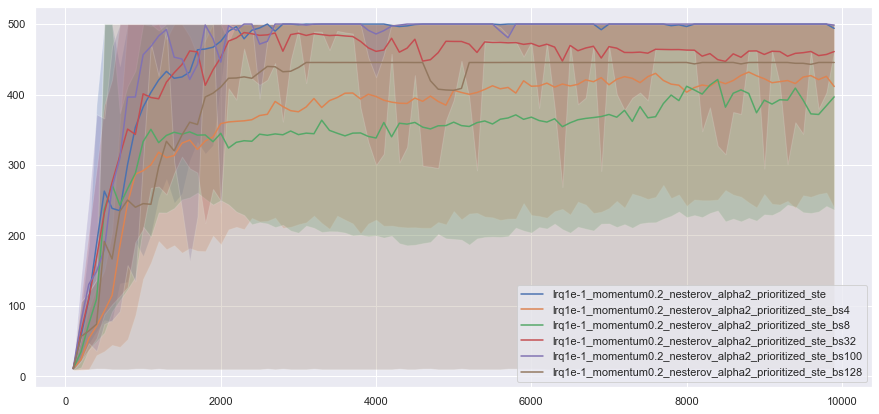

In [119]:
key = 'test_ep_returns'
plt.figure(figsize=(15,7))
for sd in [
           'lrq1e-1_momentum0.2_nesterov_alpha2_prioritized_ste',
           'lrq1e-1_momentum0.2_nesterov_alpha2_prioritized_ste_bs4',
           'lrq1e-1_momentum0.2_nesterov_alpha2_prioritized_ste_bs8',
           'lrq1e-1_momentum0.2_nesterov_alpha2_prioritized_ste_bs32',
           'lrq1e-1_momentum0.2_nesterov_alpha2_prioritized_ste_bs100',
           'lrq1e-1_momentum0.2_nesterov_alpha2_prioritized_ste_bs128',
          ]:
    plot_percentiles(results[sd]['test_ep_steps'][0],results[sd][key].T,label=sd)
_ = plt.legend()

In [73]:
for k in sorted(results.keys()):
    print(k)

lrq1e-1_momentum0.2_nesterov
lrq1e-1_momentum0.2_nesterov_alpha2
lrq1e-1_momentum0.2_nesterov_alpha2_backwards_wd1e_3
lrq1e-1_momentum0.2_nesterov_alpha2_delayed_prioritized_ste
lrq1e-1_momentum0.2_nesterov_alpha2_delayed_ste
lrq1e-1_momentum0.2_nesterov_alpha2_normal_ste
lrq1e-1_momentum0.2_nesterov_alpha2_not_discrete
lrq1e-1_momentum0.2_nesterov_alpha2_prioritized
lrq1e-1_momentum0.2_nesterov_alpha2_prioritized_binarized
lrq1e-1_momentum0.2_nesterov_alpha2_prioritized_recheck
lrq1e-1_momentum0.2_nesterov_alpha2_prioritized_ste
lrq1e-1_momentum0.2_nesterov_alpha2_prioritized_wd1e_3
lrq1e-1_momentum0.2_nesterov_alpha2_prioritized_wd1e_5
normal
normal_lrq10
normal_lrq10_2
normal_lrq10_no_beta
normal_lrq10_single_env
normal_lrq10_wout_norminp
normal_lrq10_wout_time
normal_lrq1e_2_rms_prop
normal_lrq20
prioritized_lrq10
prioritized_v2_no_batchnorm_unstable


(10, 10, 99)

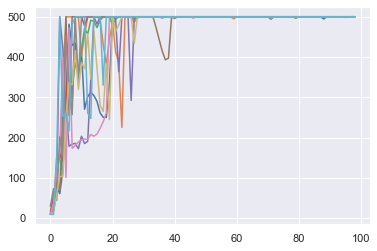

In [18]:
a = []
for i in range(0,100,10):
    b = results['normal_lrq10']['test_ep_returns'][i:i+10]
    plt.plot(b.mean(axis=0))
    a.append(b)
a = np.stack(a)
a.shape

/Users/justinmaojones/rl/env/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice.
  after removing the cwd from sys.path.
/Users/justinmaojones/rl/env/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


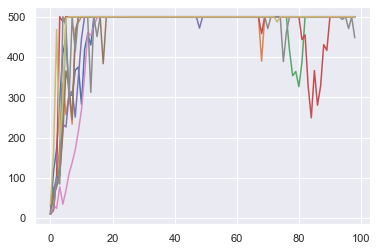

In [19]:
a = []
for i in range(0,100,10):
    b = results['lrq1e-1_momentum0.2_nesterov']['test_ep_returns'][i:i+10]
    plt.plot(b.mean(axis=0))
    a.append(b)
#a = np.stack(a)
#a.shape

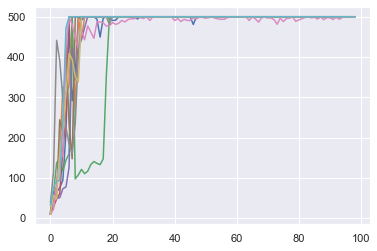

In [20]:
a = []
for i in range(0,100,10):
    b = results['lrq1e-1_momentum0.2_nesterov_alpha2_prioritized']['test_ep_returns'][i:i+10]
    plt.plot(b.mean(axis=0))
    a.append(b)
#a = np.stack(a)
#a.shape

(10, 10, 99)

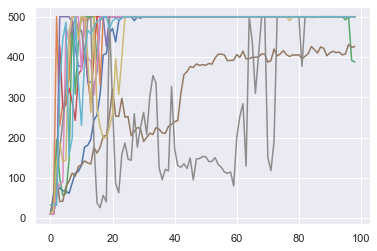

In [21]:
a = []
for i in range(0,100,10):
    b = results['normal_lrq10_2']['test_ep_returns'][i:i+10]
    plt.plot(b.mean(axis=0))
    a.append(b)
a = np.stack(a)
a.shape

(9, 10, 99)

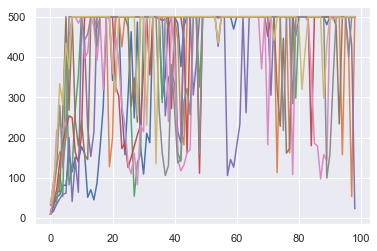

In [64]:
a = []
for i in range(0,90,10):
    b = results['normal_lrq10_no_beta']['test_ep_returns'][i:i+10]
    plt.plot(b.mean(axis=0))
    a.append(b)
a = np.stack(a)
a.shape

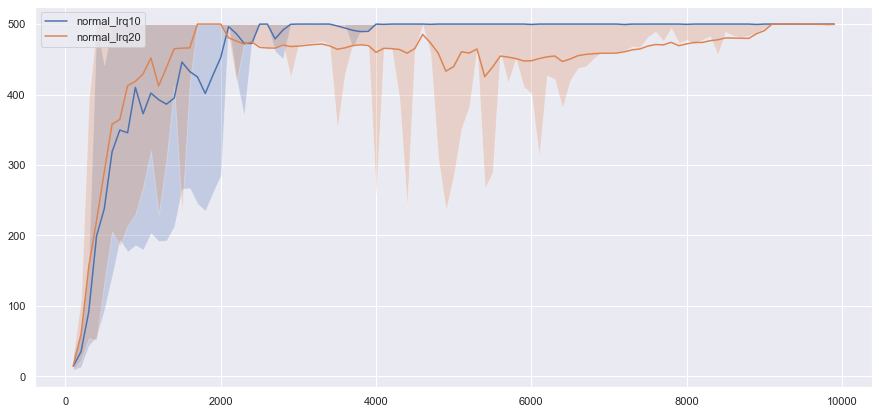

In [56]:
key = 'test_ep_returns'
plt.figure(figsize=(15,7))
for sd in ['normal_lrq10','normal_lrq20']:
    plot_percentiles(results[sd]['test_ep_steps'][0],results[sd][key].T,label=sd)
_ = plt.legend()

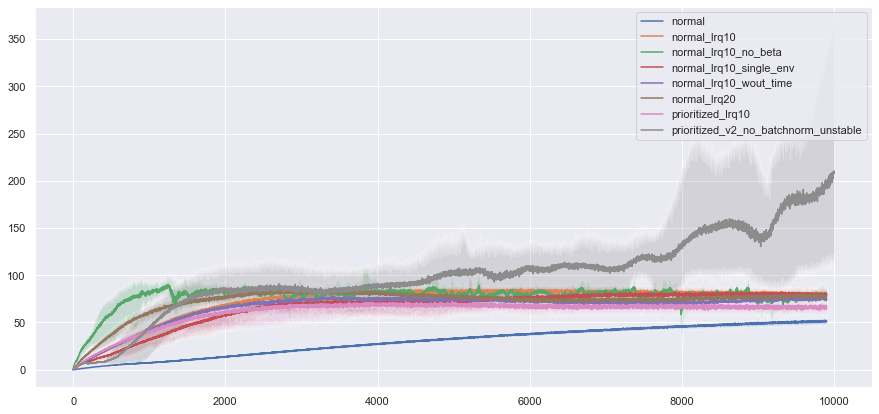

In [26]:
key = 'Q'
plt.figure(figsize=(15,7))
for sd in results:
    plot_percentiles(results[sd][key].T,label=sd)
_ = plt.legend()

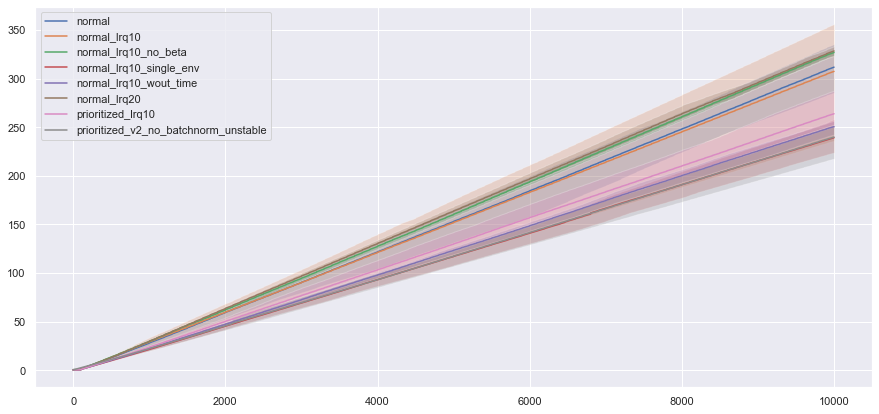

In [27]:
key = 'duration_cumulative'
plt.figure(figsize=(15,7))
for sd in results:
    plot_percentiles(results[sd][key].T,label=sd)
_ = plt.legend()

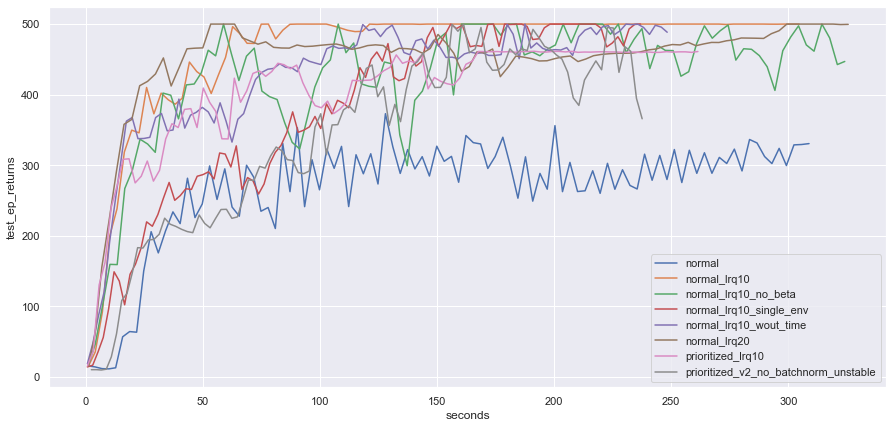

In [28]:
plt.figure(figsize=(15,7))
for sd in results:
    plt.plot(
        results[sd]['duration_cumulative'][:,results[sd]['test_ep_steps'][0]].mean(axis=0),
        results[sd]['test_ep_returns'].mean(axis=0),
        label=sd
    )
plt.xlabel('seconds')
plt.ylabel('test_ep_returns')
_ = plt.legend()